In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv('~/OneDrive/Documents/TKH-Bloomberg-Hackathon/data/data_open_weather_map.csv')


,elevation,timestamp,textDescription,temperature,dewPoint,windDirection,windSpeed,windGust,barometricPressure,seaLevelPressure,visibility,maxTemperatureLast24Hours,minTemperatureLast24Hours,precipitationLastHour,precipitationLast3Hours,precipitationLast6Hours,relativeHumidity,windChill,heatIndex
0,27,1979-01-01 00:00:00 +0000 UTC,Fog/Mist,6.32,5.12,170,6.7,NaN,1031,NaN,6400.0,NaN,NaN,NaN,NaN,NaN,92,NaN,NaN


In [72]:
df.isnull().sum() 

elevation                         0
timestamp                         0
textDescription                   0
temperature                       0
dewPoint                          1
windDirection                     0
windSpeed                         0
windGust                     325250
barometricPressure                0
seaLevelPressure             379968
visibility                    36474
maxTemperatureLast24Hours    379968
minTemperatureLast24Hours    379968
precipitationLastHour        334029
precipitationLast3Hours      375216
precipitationLast6Hours      379968
relativeHumidity                  0
windChill                    379968
heatIndex                    379968
dtype: int64

In [67]:
# I do these changes so I can plot the data from different units of time, it is also a lot faster since less data is being plotted
df.timestamp = df.timestamp.str.slice(0,19)
df.index = pd.to_datetime(df['timestamp'],format='%Y-%m-%d %H:%M:%S')

Text(0.5, 1.0, 'Temperature in Central Park over Time')

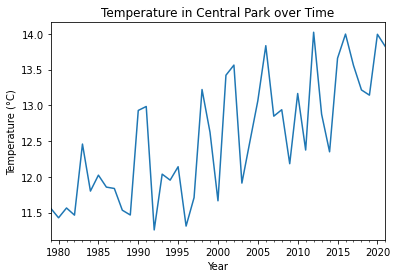

In [74]:
# 2022 won't be used in the next few visualizations since it's incomplete
df[df.timestamp<'2022'].temperature.groupby(pd.Grouper(freq='Y')).mean().plot() 
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Temperature in Central Park over Time')

Text(0.5, 1.0, 'Dewpoint in Central Park over Time')

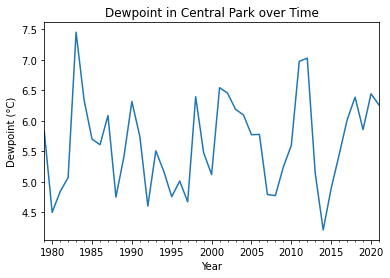

In [75]:
df[df.timestamp<'2022'].dewPoint.groupby(pd.Grouper(freq='Y')).mean().plot() 
plt.xlabel('Year')
plt.ylabel('Dewpoint (°C)')
plt.title('Dewpoint in Central Park over Time')

Text(0.5, 1.0, 'Wind Speed in Central Park over Time')

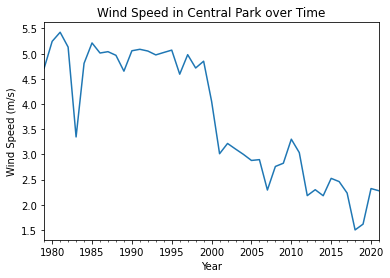

In [77]:
df[df.timestamp<'2022'].windSpeed.groupby(pd.Grouper(freq='Y')).mean().plot() 
plt.xlabel('Year')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed in Central Park over Time')

Text(0.5, 1.0, 'Barometric Pressure in Central Park over Time')

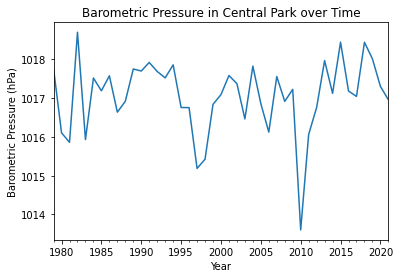

In [78]:
df[df.timestamp<'2022'].barometricPressure.groupby(pd.Grouper(freq='Y')).mean().plot() 
plt.xlabel('Year')
plt.ylabel('Barometric Pressure (hPa)')
plt.title('Barometric Pressure in Central Park over Time')

Text(0.5, 1.0, 'Wind Direction in Central Park over Time')

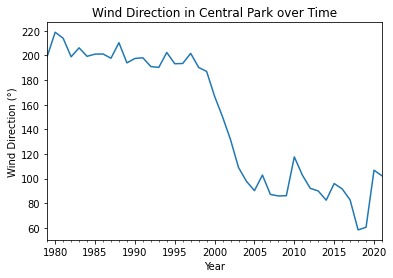

In [80]:
# 200° is around south south west direction, 90° is east
df[df.timestamp<'2022'].windDirection.groupby(pd.Grouper(freq='Y')).mean().plot() 
plt.xlabel('Year')
plt.ylabel('Wind Direction (°)')
plt.title('Wind Direction in Central Park over Time')

Text(0.5, 1.0, 'Relative Humidity in Central Park over Time')

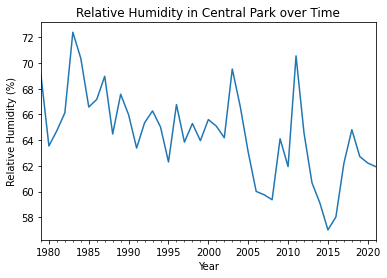

In [82]:
df[df.timestamp<'2022'].relativeHumidity.groupby(pd.Grouper(freq='Y')).mean().plot() 
plt.xlabel('Year')
plt.ylabel('Relative Humidity (%)')
plt.title('Relative Humidity in Central Park over Time')

In [112]:
df_2022 = df[df.index > '2022-01-01 00:00:00']
print(df_2022.loc['2022-03-25 09:00:00']) # This data is incorrect for some reason so it'll be excluded
df_2022 = df_2022[df_2022.temperature!=-9998.98]

elevation                                     27
timestamp                    2022-03-25 09:00:00
textDescription                    Mostly Cloudy
temperature                             -9998.98
dewPoint                                     NaN
windDirection                                278
windSpeed                                   2.05
windGust                                     NaN
barometricPressure                          1005
seaLevelPressure                             NaN
visibility                                   NaN
maxTemperatureLast24Hours                    NaN
minTemperatureLast24Hours                    NaN
precipitationLastHour                        NaN
precipitationLast3Hours                      NaN
precipitationLast6Hours                      NaN
relativeHumidity                               0
windChill                                    NaN
heatIndex                                    NaN
Name: 2022-03-25 09:00:00, dtype: object


Text(0.5, 1.0, 'Temperature in Central Park in 2022')

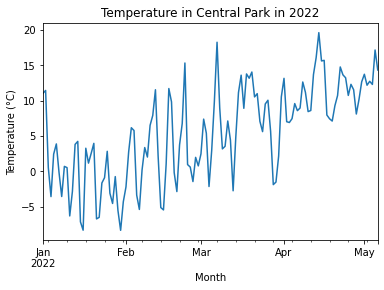

In [114]:
df_2022.temperature.groupby(pd.Grouper(freq='d')).mean().plot()
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Temperature in Central Park in 2022')